In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display

sns.set()
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
DATA_PATH = Path("../../data/taobao/")
FIGS_PATH = Path("figures/eda-taobao/")

In [3]:
%%time

df = pd.read_csv(DATA_PATH / "tianchi_mobile_recommend_train_user.csv", header=0, parse_dates=["time"])
df

CPU times: user 9.34 s, sys: 1.26 s, total: 10.6 s
Wall time: 10.6 s


,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02:00:00
1,97726136,383583590,1,NaN,5894,2014-12-09 20:00:00
2,98607707,64749712,1,NaN,2883,2014-12-18 11:00:00
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10:00:00
4,98145908,290208520,1,NaN,13926,2014-12-16 21:00:00
...,...,...,...,...,...,...
12256901,93812622,378365755,1,95q6d6a,11,2014-12-13 21:00:00
12256902,93812622,177724753,1,NaN,12311,2014-12-14 21:00:00
12256903,93812622,234391443,1,NaN,8765,2014-12-11 16:00:00
12256904,93812622,26452000,1,95q6dqc,7951,2014-12-08 22:00:00


In [10]:
df.count()

user_id          12256906
item_id          12256906
behavior_type    12256906
user_geohash      3922082
item_category    12256906
time             12256906
dtype: int64

In [4]:
lens = df.groupby("user_id").size()
lens

user_id
4913         1742
6118          117
7528          214
7591          859
12645         268
             ... 
142376113     322
142412247     335
142430177    1481
142450275    6819
142455899    1351
Length: 10000, dtype: int64

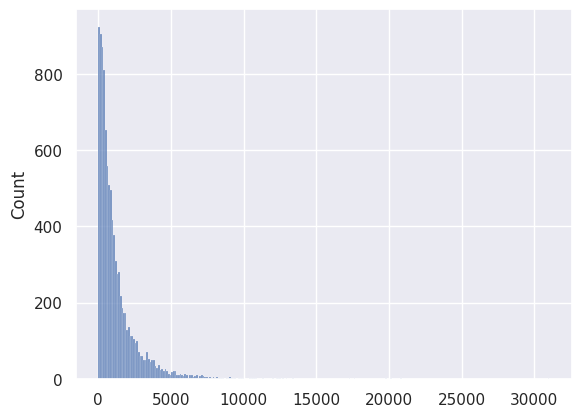

In [5]:
fig, ax = plt.subplots()

sns.histplot(lens, ax=ax)

fig.savefig(FIGS_PATH / "train_len.svg")

In [6]:
last_dt = (
    df
    .groupby("user_id")
    ["time"]
    .max()
)

In [7]:
dts = (
    df
    [["user_id", "time"]]
    .set_index("user_id")
    .pipe(lambda df: df.join(df.groupby(level=0).size().rename("weights")))
    .assign(weights=lambda df: 1 / df.weights / df.index.nunique())
)
dts

,time,weights
user_id,,
98047837,2014-12-06 02:00:00,5.621135e-08
97726136,2014-12-09 20:00:00,1.479290e-07
98607707,2014-12-18 11:00:00,6.557377e-08
98662432,2014-12-06 10:00:00,2.439024e-06
98145908,2014-12-16 21:00:00,5.882353e-07
...,...,...
93812622,2014-12-13 21:00:00,2.941176e-06
93812622,2014-12-14 21:00:00,2.941176e-06
93812622,2014-12-11 16:00:00,2.941176e-06


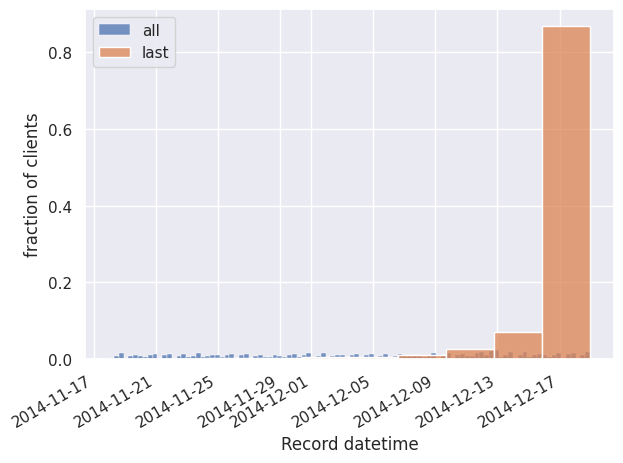

In [9]:
fig, ax = plt.subplots(layout="tight")

sns.histplot(
    dts,
    x="time",
    weights="weights",
    bins=100,
    ax=ax,
    label="all",
)

sns.histplot(
    x=last_dt,
    weights=np.ones(len(last_dt)) / len(last_dt),
    bins=10,
    ax=ax,
    label="last",
)

ax.set_xlabel("Record datetime")
ax.set_ylabel("fraction of clients")
ax.legend()
fig.autofmt_xdate()

fig.savefig(FIGS_PATH / "rec_time_hist.svg")